In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_train = pd.read_csv('Titanic-project-kaggle/train.csv', header=None) #Never place header = None
data_test =  pd.read_csv('Titanic-project-kaggle/test.csv', header=None)
data_train.columns = ['Pid','Survived', 'Pclass','Name','Sex','Age','Sibsp','Parch','Ticket','Fare','Cabin','Embarked']
data_test.columns =  ['Pid', 'Pclass','Name','Sex','Age','Sibsp','Parch','Ticket','Fare','Cabin','Embarked']

print(len(data_train));
print(len(data_test));


892
419


In [3]:
data_train.info()
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
Pid         892 non-null object
Survived    892 non-null object
Pclass      892 non-null object
Name        892 non-null object
Sex         892 non-null object
Age         715 non-null object
Sibsp       892 non-null object
Parch       892 non-null object
Ticket      892 non-null object
Fare        892 non-null object
Cabin       205 non-null object
Embarked    890 non-null object
dtypes: object(12)
memory usage: 83.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 11 columns):
Pid         419 non-null object
Pclass      419 non-null object
Name        419 non-null object
Sex         419 non-null object
Age         333 non-null object
Sibsp       419 non-null object
Parch       419 non-null object
Ticket      419 non-null object
Fare        418 non-null object
Cabin       92 non-null object
Embarked    419 non-null object
dtypes: objec

In [4]:
#data_train = data_train.iloc[0:]
data_train.drop(data_train.head(1).index, inplace=True)
print(data_train.head())
data_test.drop(data_test.head(1).index, inplace=True)
print(data_test.head())

  Pid Survived Pclass                                               Name  \
1   1        0      3                            Braund, Mr. Owen Harris   
2   2        1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3   3        1      3                             Heikkinen, Miss. Laina   
4   4        1      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5   5        0      3                           Allen, Mr. William Henry   

      Sex Age Sibsp Parch            Ticket     Fare Cabin Embarked  
1    male  22     1     0         A/5 21171     7.25   NaN        S  
2  female  38     1     0          PC 17599  71.2833   C85        C  
3  female  26     0     0  STON/O2. 3101282    7.925   NaN        S  
4  female  35     1     0            113803     53.1  C123        S  
5    male  35     0     0            373450     8.05   NaN        S  
   Pid Pclass                                          Name     Sex   Age  \
1  892      3                              Kel

In [5]:
print(data_train.tail())
print("\n Columns are \n")
print(data_train.columns)

     Pid Survived Pclass                                      Name     Sex  \
887  887        0      2                     Montvila, Rev. Juozas    male   
888  888        1      1              Graham, Miss. Margaret Edith  female   
889  889        0      3  Johnston, Miss. Catherine Helen "Carrie"  female   
890  890        1      1                     Behr, Mr. Karl Howell    male   
891  891        0      3                       Dooley, Mr. Patrick    male   

     Age Sibsp Parch      Ticket   Fare Cabin Embarked  
887   27     0     0      211536     13   NaN        S  
888   19     0     0      112053     30   B42        S  
889  NaN     1     2  W./C. 6607  23.45   NaN        S  
890   26     0     0      111369     30  C148        C  
891   32     0     0      370376   7.75   NaN        Q  

 Columns are 

Index(['Pid', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Q1-Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex, and Embarked. 
Ordinal: Pclass.

Q2-Which features are numerical? 
These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: Age, Fare. 
Discrete: SibSp, Parch.

Q3-Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. 
Cabin is alphanumeric.



Q4- Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

Q5- Which features contain blank, null or empty values?

In [6]:
print(data_train.isnull().sum())

Pid           0
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Sibsp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

Q6- What are the data types for various features?

In [7]:
data_train["Age"] = pd.to_numeric(data_train.Age, errors='coerce')
data_train["Age"].describe()

data_train["Fare"] = pd.to_numeric(data_train.Fare, errors='coerce')
data_train["Fare"].describe()

data_train["Pid"] = pd.to_numeric(data_train.Pid, errors='coerce')
data_train["Pid"].describe()

data_train["Survived"] = pd.to_numeric(data_train.Survived, errors='coerce')
data_train["Survived"].describe()


data_train["Pclass"] = pd.to_numeric(data_train.Pclass, errors='coerce')
data_train["Pclass"].describe()


data_train["Sibsp"] = pd.to_numeric(data_train.Sibsp, errors='coerce')
data_train["Sibsp"].describe()

data_train["Parch"] = pd.to_numeric(data_train.Parch, errors='coerce')
data_train["Parch"].describe()

##-----------------------------------------------------------------------##
##For Test Data set
##-----------------------------------------------------------------------##

data_test["Age"] = pd.to_numeric(data_test.Age, errors='coerce')
data_test["Age"].describe()

data_test["Fare"] = pd.to_numeric(data_test.Fare, errors='coerce')
data_test["Fare"].describe()

data_test["Pid"] = pd.to_numeric(data_test.Pid, errors='coerce')
data_test["Pid"].describe()

data_test["Pclass"] = pd.to_numeric(data_test.Pclass, errors='coerce')
data_test["Pclass"].describe()


data_test["Sibsp"] = pd.to_numeric(data_test.Sibsp, errors='coerce')
data_test["Sibsp"].describe()

data_test["Parch"] = pd.to_numeric(data_test.Parch, errors='coerce')
data_test["Parch"].describe()

data_train.info()
print('_'*40)
print('_'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Pid         891 non-null int64
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
Sibsp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
________________________________________
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 11 columns):
Pid         418 non-null int64
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
Sibsp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare       

Here are the results::
Seven features are floats. Six in case of test dataset.
Five features are strings (object).

Q7- What is the distribution of numerical feature values across the samples?

In [8]:
#data_train.isnull().sum() 
#Calculating Median
median = data_train['Age'].median()
data_train['Age'].fillna(median, inplace=True)
data_test['Age'].fillna(median, inplace=True)
data_train.isnull().sum() 



Pid           0
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Sibsp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

1. Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224). (agreed)
2. Survived is a categorical feature with 0 or 1 values. (agreed)
3. Around 38% samples survived representative of the actual survival rate at 32%.
4. Most passengers (> 75%) did not travel with parents or children.
5. Nearly 30% of the passengers had siblings and/or spouse aboard.
6. Fares varied significantly with few passengers (<1%) paying as high as $512.
7. Few elderly passengers (<1%) within age range 65-80.

In [9]:
data_train.describe()

,Pid,Survived,Pclass,Age,Sibsp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
percentile = [.61,.62] 
data_train["Survived"].describe(percentiles = percentile)

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [11]:
## Review Parch distribution using `percentiles=[.75, .8]`
percentile = [.75,.8] 
data_train["Parch"].describe(percentiles = percentile)


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
75%        0.000000
80%        1.000000
max        6.000000
Name: Parch, dtype: float64

Q- What is the distribution of categorical features?


1. Names are unique across the dataset (count=unique=891)

2. Sex variable as two possible values with 64% male (top=male, freq=577/count=891).

3. Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

4. Embarked takes three possible values. S port used by most passengers (top=S)

5. Ticket feature has high ratio (26%) of duplicate values (unique=681).

In [12]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hood, Mr. Ambrose Jr",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


Hint:::: 

DataFrame.describe(include=['O']) should include categorical columns only.

MOST IMPORTANT MARKDOWN ::

Asspumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.

Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.

We may want to engineer the Name feature to extract Title as a new feature.

We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
(through Binning)

We may also want to create a Fare range feature if it helps our analysis.

Classifying.

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.


So first of all we will analyze correlation between features:

1) Pclass with survival

In [13]:
print(data_train.groupby('Pclass')['Pid'].count().sort_values(ascending=True).head())
data_train[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived',ascending = False)


Pclass
2    184
1    216
3    491
Name: Pid, dtype: int64


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass 3 has most no. of passengers (491) but they survived only 24%, 

However, Pclass 1 has 216 passengers, from which they survived most (62%).

2) Gender with survival

In [14]:
print(data_train.groupby('Sex')['Pid'].count().sort_values(ascending=True).head())
data_train[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

Sex
female    314
male      577
Name: Pid, dtype: int64


,Sex,Survived
0,female,0.742038
1,male,0.188908


74% Females have survived.

3) sibsp with survival

In [15]:
print(data_train.groupby('Sibsp')['Pid'].count().sort_values(ascending=True).head())
data_train[['Sibsp','Survived']].groupby(['Sibsp'],as_index =False).mean().sort_values(by = 'Survived',ascending = False)

Sibsp
5     5
8     7
3    16
4    18
2    28
Name: Pid, dtype: int64


,Sibsp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


53% with 1 Siblings have survived.
4) Parch with survival

In [16]:
data_train[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


60% with 3 arents/childrens have survived.


Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Age is the most important feature in this dataset. So , lets visualize correlation between age and survival.

c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


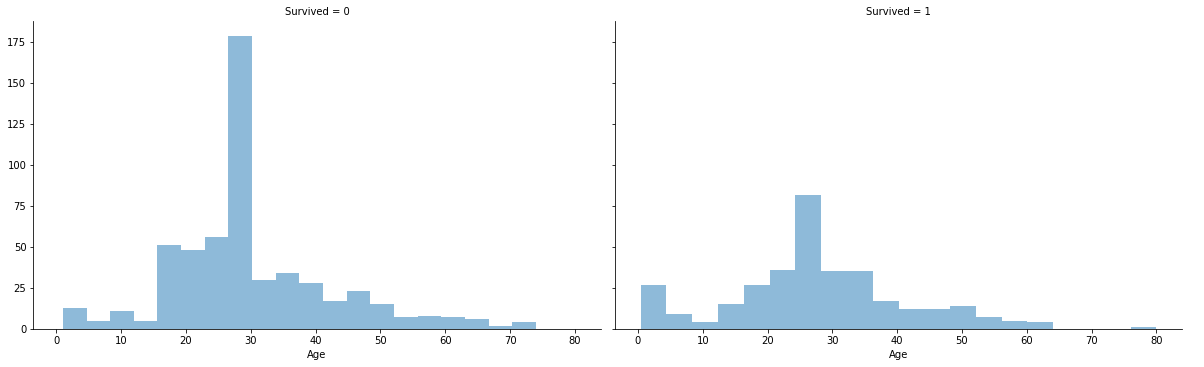

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data_train, col='Survived', size=5.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

Observations from above histogram are as follows:

1. Infants (Age <=4) had high survival rate.
2. Oldest passengers (Age = 80) survived.
3. Large number of 15-25 year olds did not survive.
4. Most passengers are in 15-35 age range.



Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

1. We should consider Age in our model training.
2. Complete the Age feature for null values (Done already).
3. We should band age groups (Binning).

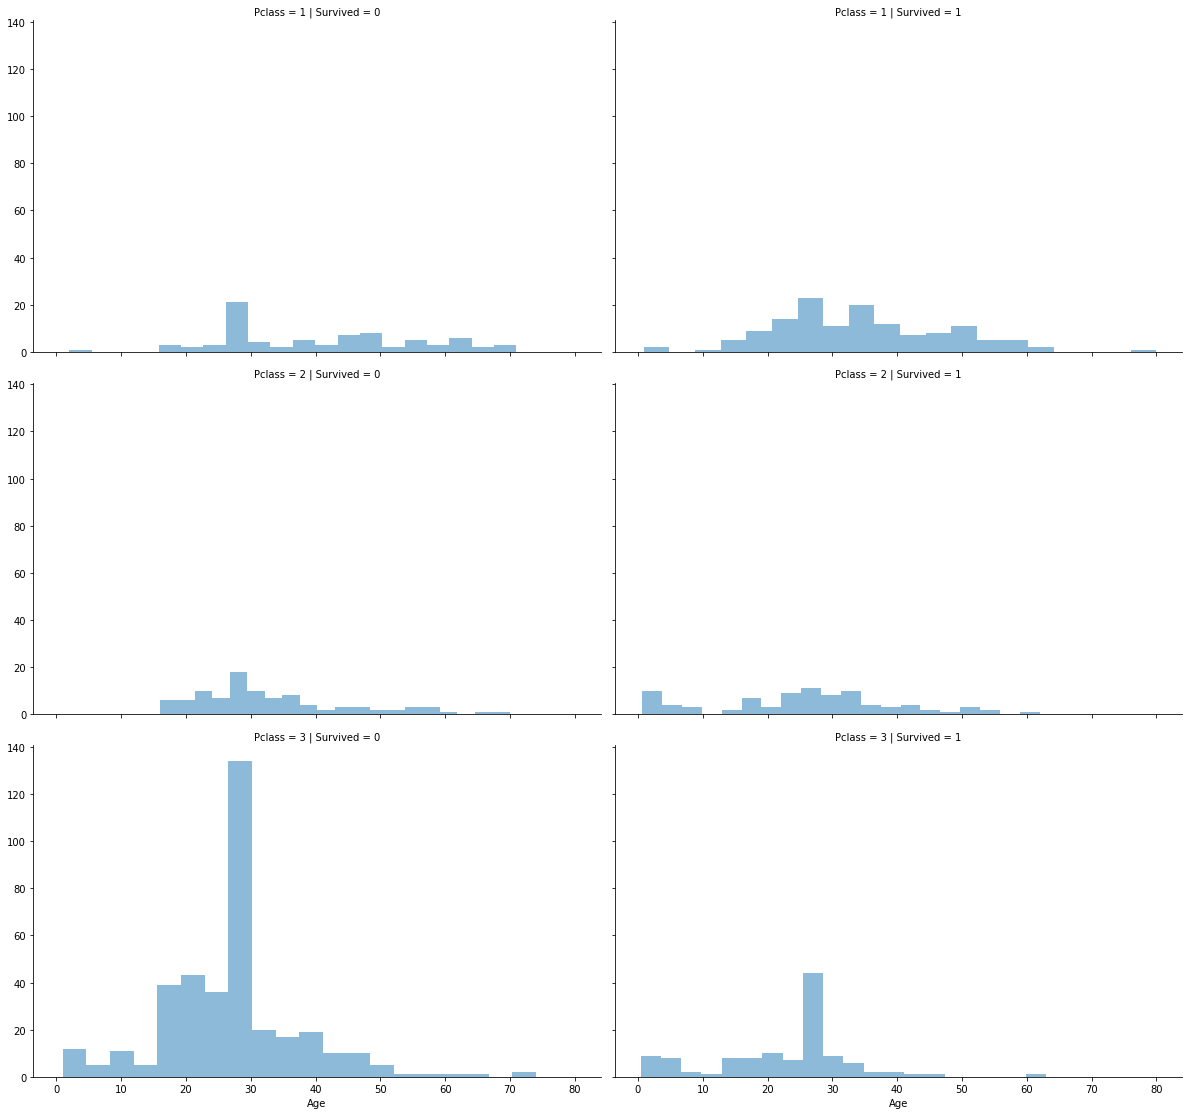

In [18]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=5.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Our Assumptions:
1) PClass 1 have survived most.
2) PClass 2 have greater infants survival.
3) PClass 3 have highest death rate, in addition, PClass 3 have most no. of passengers travelling.


Decisions.

Consider Pclass for model training.


c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


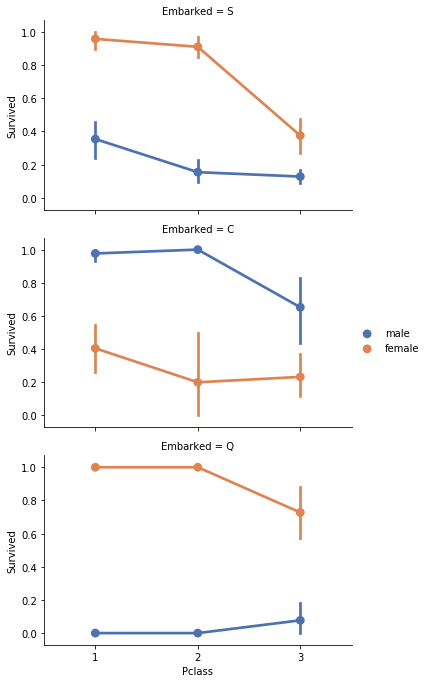

In [19]:
grid = sns.FacetGrid(data_train, row='Embarked', size=3.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
grid.add_legend();

Observations:
    1. In embarked 'S', female survial rate is high
    2. Exception in Embarked=C where males had higher survival rate. This could be a correlation between 
    Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
    3. Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
    4. Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
    
Decisions.

    1. Add Sex feature to model training.
    2. Complete and add Embarked feature to model training.    

c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


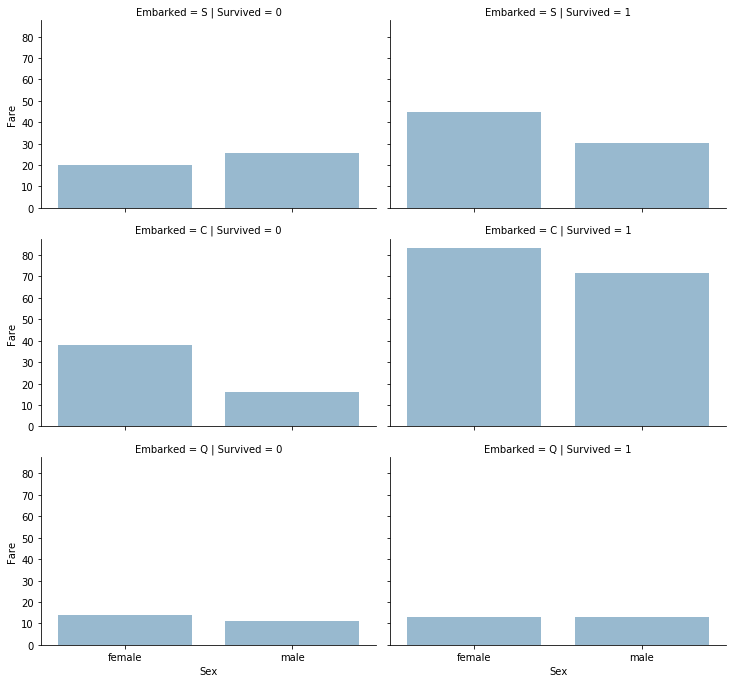

In [20]:
grid = sns.FacetGrid(data_train, row='Embarked',col = 'Survived', size=3.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None)
grid.add_legend();

Observations.

1. Higher fare paying passengers had better survival.
2. Port of embarkation correlates with survival rates. 

Decisions.

Consider banding Fare feature.


## Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

# Correcting by dropping features

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [21]:
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop(['Ticket', 'Cabin'], axis=1)
data_test = data_test.drop(['Ticket', 'Cabin'], axis=1)
combine2 = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine2[0].shape, combine2[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


First we will change name column, then apply binning to age column.

In [22]:
for dataset in combine2:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [23]:
data_train.head()

,Pid,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Title
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [24]:
pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.
For e.g. Mr to 1, Mrs to 2 so on.

In [25]:
for dataset in combine2:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [26]:
data_train.head(10)

,Pid,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Title
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
6,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,Mr
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs


In [27]:
data_train[['Title','Survived']].groupby(['Title'],as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
#We can convert the categorical titles to ordinal.

titlemapping = {'Mr':1, 'Miss':2,'Mrs':3, 'Master':4,'Rare':5}
for row in combine2:
    row["Title"] = row["Title"].map(titlemapping)
    row['Title'] = row['Title'].fillna(0)
    

In [29]:
data_train.head(10)

,Pid,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Title
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
6,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [30]:
#Now we can drop Name column. We also do not need the PassengerId feature in the training dataset.

data_train = data_train.drop(['Name', 'Pid'],axis = 1)
data_test = data_test.drop(['Name'],axis = 1)
combine2 = [data_train, data_test]
data_train.shape, data_test.shape
#data_train.head(10)

((891, 9), (418, 9))

In [31]:
#Lets change Sex Column
titlemapping = {'male':0, 'female':1}
for row in combine2:
    row["Sex"] = row["Sex"].map(titlemapping).astype(int)
    
    row['Sex'] = row['Sex'].fillna(0)

In [32]:
data_train.head(10)

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Title
1,0,3,0,22.0,1,0,7.2500,S,1
2,1,1,1,38.0,1,0,71.2833,C,3
3,1,3,1,26.0,0,0,7.9250,S,2
4,1,1,1,35.0,1,0,53.1000,S,3
5,0,3,0,35.0,0,0,8.0500,S,1
6,0,3,0,28.0,0,0,8.4583,Q,1
7,0,1,0,54.0,0,0,51.8625,S,1
8,0,3,0,2.0,3,1,21.0750,S,4
9,1,3,1,27.0,0,2,11.1333,S,3
10,1,2,1,14.0,1,0,30.0708,C,3


In [33]:
#Binning of age

data_train["Ageband"] = pd.cut(data_train["Age"],5)
data_train[['Ageband','Survived']].groupby(['Ageband'],as_index = False).mean().sort_values(by='Ageband', ascending=True)

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [34]:
#Let us replace Age with ordinals based on these bands.

for row in combine2:
    row.loc[row["Age"] <= 16.336,'Age'] = 0
    row.loc[(row['Age'] > 16.336) & (row["Age"] <= 32.252),'Age'] = 1
    
    row.loc[(row["Age"] > 32.252) & (row["Age"] <= 48.168),'Age'] = 2
    row.loc[(row["Age"] > 48.168) & (row["Age"] <= 64.084),'Age'] = 3
    row.loc[row["Age"] > 64.084,'Age' ] = 4


In [35]:
data_train["Age"] = data_train["Age"].astype(int)
data_train.head(10)

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Title,Ageband
1,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]"
2,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]"
3,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]"
4,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]"
5,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]"
6,0,3,0,1,0,0,8.4583,Q,1,"(16.336, 32.252]"
7,0,1,0,3,0,0,51.8625,S,1,"(48.168, 64.084]"
8,0,3,0,0,3,1,21.0750,S,4,"(0.34, 16.336]"
9,1,3,1,1,0,2,11.1333,S,3,"(16.336, 32.252]"
10,1,2,1,0,1,0,30.0708,C,3,"(0.34, 16.336]"


In [36]:
#Delete Age band column from tarin dataset
data_train = data_train.drop(['Ageband'],axis = 1)
#data_test = data_test.drop(['Name'],axis = 1)
combine2 = [data_train, data_test]
data_train.shape, data_test.shape

((891, 9), (418, 9))

Create new feature combining existing features
We can create a new feature for "FamilySize" which combines Parch and SibSp. 

This will enable us to drop Parch and SibSp from our datasets.

In [37]:
#for row in combine2:
    #row['FamilySize'] = row['Sibsp'] + row['Parch']+1
for dataset in combine2:
    
    dataset["FamilySize"] = dataset['Sibsp'] + dataset['Parch'] + 1

In [38]:
data_train.head()


,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Title,FamilySize
1,0,3,0,1,1,0,7.2500,S,1,2
2,1,1,1,2,1,0,71.2833,C,3,2
3,1,3,1,1,0,0,7.9250,S,2,1
4,1,1,1,2,1,0,53.1000,S,3,2
5,0,3,0,2,0,0,8.0500,S,1,1


In [39]:
data_train[["FamilySize","Survived"]].groupby(["FamilySize"],as_index= False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
#We can create another feature called IsAlone.
#iS ALONE MEANS =>>>> IF HE HAS FAMILY MEMBER EQUAL TO 1 THEN ISALONE VALUE IS 1 (FALSE) ELSE 0 (iSALONE TRUE)
#0 means yes , 1 means no
#isalon = 0 means yes, he is alone
for row in combine2:
    row["IsAlone"] = 0
    row.loc[row["FamilySize"] == 1,'IsAlone'] = 1
    

In [41]:
data_train[['IsAlone','Survived']].groupby(['IsAlone'],as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.
data_train = data_train.drop(['Parch', 'Sibsp', 'FamilySize'], axis=1)
data_test = data_test.drop(['Parch', 'Sibsp', 'FamilySize'], axis=1)
combine2 = [data_train, data_test]

In [43]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
1,0,3,0,1,7.2500,S,1,0
2,1,1,1,2,71.2833,C,3,0
3,1,3,1,1,7.9250,S,2,1
4,1,1,1,2,53.1000,S,3,0
5,0,3,0,2,8.0500,S,1,1


In [44]:
#We can also create an artificial feature combining Pclass and Age.
for row in combine2:
    row['Age*Class'] = row.Age * row.Pclass


Take median for null values in embarked

In [45]:
freq_port = data_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [46]:
#Replace S as median
for dataset in combine2:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [47]:
titlemapping = {'S':0, 'C':1,'Q':3}
for row in combine2:
    row["Embarked"] = row["Embarked"].map(titlemapping).astype(int)
    

In [48]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
1,0,3,0,1,7.2500,0,1,0,3
2,1,1,1,2,71.2833,1,3,0,2
3,1,3,1,1,7.9250,0,2,1,3
4,1,1,1,2,53.1000,0,3,0,2
5,0,3,0,2,8.0500,0,1,1,6


In [49]:


AvgFare = data_train['Fare'].median()
data_train['Fare'].fillna(AvgFare, inplace=True)
data_test['Fare'].fillna(AvgFare, inplace=True)

data_train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
1,0,3,0,1,7.2500,0,1,0,3
2,1,1,1,2,71.2833,1,3,0,2
3,1,3,1,1,7.9250,0,2,1,3
4,1,1,1,2,53.1000,0,3,0,2
5,0,3,0,2,8.0500,0,1,1,6


Create FareBand, first check its cut values

In [50]:
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand','Survived']].groupby(['FareBand'],as_index = False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [51]:
#Now Create bining inthe given format above
for row in combine2:
    row.loc[row['Fare'] <= 7.91,'Fare'] = 0
    row.loc[(row['Fare']>7.91) & (row['Fare']<= 14.54),'Fare'] = 1
    row.loc[(row['Fare']>14.54) & (row['Fare']<= 31.0),'Fare'] = 2
    row.loc[(row['Fare']>31.0) & (row['Fare']<= 512.329),'Fare'] = 3
data_train['Fare'] = data_train['Fare'].astype(int)

In [52]:
data_train = data_train.drop(['FareBand'], axis=1)
#data_test = data_test.drop(['Parch', 'Sibsp', 'FamilySize'], axis=1)
combine2 = [data_train, data_test]

In [53]:
#Preprocessed and prepared training data set for model prediction is here:::::
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
1,0,3,0,1,0,0,1,0,3
2,1,1,1,2,3,1,3,0,2
3,1,3,1,1,1,0,2,1,3
4,1,1,1,2,3,0,3,0,2
5,0,3,0,2,1,0,1,1,6


In [54]:

#Preprocessed and prepared TEST data set for model prediction is here:::::
data_test.head()

,Pid,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
1,892,3,0,2.0,0.0,3,1,1,6.0
2,893,3,1,2.0,0.0,0,3,0,6.0
3,894,2,0,3.0,1.0,3,1,1,6.0
4,895,3,0,1.0,1.0,0,1,1,3.0
5,896,3,1,1.0,1.0,0,3,0,3.0


Model, predict and solve


Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

Firstly Checking null values in test data and train data set:

In [55]:
print(data_test.isnull().sum())

Pid          0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Title        0
IsAlone      0
Age*Class    0
dtype: int64


In [56]:
print(data_train.isnull().sum())

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Title        0
IsAlone      0
Age*Class    0
dtype: int64


In [57]:
X_Train = data_train.drop("Survived",axis =1)
Y_Train = data_train["Survived"]
X_Test = data_test.drop(["Pid"],axis =1)

X_Train.shape,Y_Train.shape,X_Test.shape

((891, 8), (891,), (418, 8))

In [58]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)
Y_pred = logreg.predict(X_Test)
acc_log = round(logreg.score(X_Train, Y_Train) * 100, 2)
acc_log

c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.03

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [59]:
# Support Vector Machines

svc = SVC()
svc.fit(X_Train, Y_Train)
Y_pred = svc.predict(X_Test)
acc_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
acc_svc

c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.95

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

KNN confidence score is better than Logistics Regression but worse than SVM.



In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_Train, Y_Train)
Y_pred = knn.predict(X_Test)
acc_knn = round(knn.score(X_Train, Y_Train) * 100, 2)
print(Y_pred)
acc_knn


[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


85.63

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem 
with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, 
requiring a number of parameters linear in the number of variables (features) in a learning problem. 

The model generated confidence score is the lowest among the models evaluated so far.

In [63]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_Train, Y_Train)
Y_pred = gaussian.predict(X_Test)
acc_gaussian = round(gaussian.score(X_Train, Y_Train) * 100, 2)
acc_gaussian

73.85

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference Wikipedia.

In [64]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_Train, Y_Train)
Y_pred = perceptron.predict(X_Test)
acc_Percep = round(perceptron.score(X_Train, Y_Train) * 100, 2)
acc_Percep

76.09

In [69]:
# Linear SVC
Linear_svc = LinearSVC()
Linear_svc.fit(X_Train,Y_Train)
Y_pred = Linear_svc.predict(X_Test)
accLinearSVC = round(Linear_svc.score(X_Train,Y_Train)*100,2)
accLinearSVC

c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.57

In [70]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)
Y_pred = sgd.predict(X_Test)
acc_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
acc_sgd


78.9

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far.

In [71]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_Train, Y_Train)
Y_pred = decision_tree.predict(X_Test)
acc_decision_tree = round(decision_tree.score(X_Train, Y_Train) * 100, 2)
acc_decision_tree

87.43

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [72]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_Train, Y_Train)
Y_pred = random_forest.predict(X_Test)
random_forest.score(X_Train, Y_Train)
acc_random_forest = round(random_forest.score(X_Train, Y_Train) * 100, 2)
acc_random_forest

87.43

Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_Percep, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.43
8,Decision Tree,87.43
1,KNN,85.63
0,Support Vector Machines,83.95
2,Logistic Regression,81.03
7,Linear SVC,79.80
6,Stochastic Gradient Decent,78.90
5,Perceptron,76.09
4,Naive Bayes,73.85


In [81]:
submission = pd.DataFrame({
        "PassengerId": data_test["Pid"],
        "Survived": Y_pred
    })
submission.to_csv('Titanic-project-kaggle/submission_Kaggle.csv', index=False)